INFO:absl:Load dataset info from gs://gresearch/robotics/fractal20220817_data/0.1.0
INFO:absl:Creating a tf.data.Dataset reading 1 files located in folders: gs://gresearch/robotics/fractal20220817_data/0.1.0.
INFO:absl:Constructing tf.data.Dataset fractal20220817_data for split train[:10], from gs://gresearch/robotics/fractal20220817_data/0.1.0


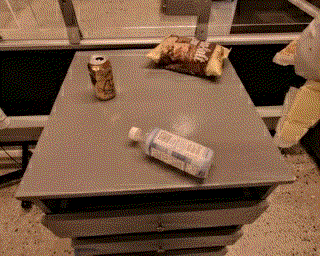

In [36]:

import numpy as np
import tensorflow_datasets as tfds
from PIL import Image
from IPython import display
from util import as_gif, dataset2path
# choose the dataset path in the dropdown on the right and rerun this cell
# to see multiple samples

dataset = 'fractal20220817_data' # @param ['fractal20220817_data', 'kuka', 'bridge', 'taco_play', 'jaco_play', 'berkeley_cable_routing', 'roboturk', 'nyu_door_opening_surprising_effectiveness', 'viola', 'berkeley_autolab_ur5', 'toto', 'language_table', 'columbia_cairlab_pusht_real', 'stanford_kuka_multimodal_dataset_converted_externally_to_rlds', 'nyu_rot_dataset_converted_externally_to_rlds', 'stanford_hydra_dataset_converted_externally_to_rlds', 'austin_buds_dataset_converted_externally_to_rlds', 'nyu_franka_play_dataset_converted_externally_to_rlds', 'maniskill_dataset_converted_externally_to_rlds', 'furniture_bench_dataset_converted_externally_to_rlds', 'cmu_franka_exploration_dataset_converted_externally_to_rlds', 'ucsd_kitchen_dataset_converted_externally_to_rlds', 'ucsd_pick_and_place_dataset_converted_externally_to_rlds', 'austin_sailor_dataset_converted_externally_to_rlds', 'austin_sirius_dataset_converted_externally_to_rlds', 'bc_z', 'usc_cloth_sim_converted_externally_to_rlds', 'utokyo_pr2_opening_fridge_converted_externally_to_rlds', 'utokyo_pr2_tabletop_manipulation_converted_externally_to_rlds', 'utokyo_saytap_converted_externally_to_rlds', 'utokyo_xarm_pick_and_place_converted_externally_to_rlds', 'utokyo_xarm_bimanual_converted_externally_to_rlds', 'robo_net', 'berkeley_mvp_converted_externally_to_rlds', 'berkeley_rpt_converted_externally_to_rlds', 'kaist_nonprehensile_converted_externally_to_rlds', 'stanford_mask_vit_converted_externally_to_rlds', 'tokyo_u_lsmo_converted_externally_to_rlds', 'dlr_sara_pour_converted_externally_to_rlds', 'dlr_sara_grid_clamp_converted_externally_to_rlds', 'dlr_edan_shared_control_converted_externally_to_rlds', 'asu_table_top_converted_externally_to_rlds', 'stanford_robocook_converted_externally_to_rlds', 'eth_agent_affordances', 'imperialcollege_sawyer_wrist_cam', 'iamlab_cmu_pickup_insert_converted_externally_to_rlds', 'uiuc_d3field', 'utaustin_mutex', 'berkeley_fanuc_manipulation', 'cmu_food_manipulation', 'cmu_play_fusion', 'cmu_stretch', 'berkeley_gnm_recon', 'berkeley_gnm_cory_hall', 'berkeley_gnm_sac_son']
display_key = 'image'

b = tfds.builder_from_directory(builder_dir=dataset2path(dataset))
if display_key not in b.info.features['steps']['observation']:
  raise ValueError(
      f"The key {display_key} was not found in this dataset.\n"
      + "Please choose a different image key to display for this dataset.\n"
      + "Here is the observation spec:\n"
      + str(b.info.features['steps']['observation']))

ds = b.as_dataset(split='train[:10]').shuffle(10)   # take only first 10 episodes
episode = next(iter(ds))
images = [step['observation'][display_key] for step in episode['steps']]
images = [Image.fromarray(image.numpy()) for image in images]
display.Image(as_gif(images))

In [56]:
ds

<_ShuffleDataset element_spec={'aspects': {'already_success': TensorSpec(shape=(), dtype=tf.bool, name=None), 'feasible': TensorSpec(shape=(), dtype=tf.bool, name=None), 'has_aspects': TensorSpec(shape=(), dtype=tf.bool, name=None), 'success': TensorSpec(shape=(), dtype=tf.bool, name=None), 'undesirable': TensorSpec(shape=(), dtype=tf.bool, name=None)}, 'attributes': {'collection_mode': TensorSpec(shape=(), dtype=tf.int64, name=None), 'collection_mode_name': TensorSpec(shape=(), dtype=tf.string, name=None), 'data_type': TensorSpec(shape=(), dtype=tf.int64, name=None), 'data_type_name': TensorSpec(shape=(), dtype=tf.string, name=None), 'env': TensorSpec(shape=(), dtype=tf.int64, name=None), 'env_name': TensorSpec(shape=(), dtype=tf.string, name=None), 'location': TensorSpec(shape=(), dtype=tf.int64, name=None), 'location_name': TensorSpec(shape=(), dtype=tf.string, name=None), 'objects_family': TensorSpec(shape=(), dtype=tf.int64, name=None), 'objects_family_name': TensorSpec(shape=(), 

In [37]:
episode

{'aspects': {'already_success': <tf.Tensor: shape=(), dtype=bool, numpy=False>,
  'feasible': <tf.Tensor: shape=(), dtype=bool, numpy=False>,
  'has_aspects': <tf.Tensor: shape=(), dtype=bool, numpy=False>,
  'success': <tf.Tensor: shape=(), dtype=bool, numpy=False>,
  'undesirable': <tf.Tensor: shape=(), dtype=bool, numpy=False>},
 'attributes': {'collection_mode': <tf.Tensor: shape=(), dtype=int64, numpy=0>,
  'collection_mode_name': <tf.Tensor: shape=(), dtype=string, numpy=b'UNSPECIFIED_COLLECTION_MODE'>,
  'data_type': <tf.Tensor: shape=(), dtype=int64, numpy=0>,
  'data_type_name': <tf.Tensor: shape=(), dtype=string, numpy=b'UNSPECIFIED_DATA_TYPE'>,
  'env': <tf.Tensor: shape=(), dtype=int64, numpy=0>,
  'env_name': <tf.Tensor: shape=(), dtype=string, numpy=b'UNSPECIFIED_ENV_TYPE'>,
  'location': <tf.Tensor: shape=(), dtype=int64, numpy=0>,
  'location_name': <tf.Tensor: shape=(), dtype=string, numpy=b'UNSPECIFIED_LOCATION'>,
  'objects_family': <tf.Tensor: shape=(), dtype=int64,

In [57]:
description = list([str(step['observation']["natural_language_instruction"].numpy().decode()) for step in episode['steps']])[0]
description

'knock orange can over'

In [58]:
for step in episode['steps']:
    print("step", list(step.keys()))
    print("observation", list(step["observation"].keys()))
    print(list(step["action"].keys()))
    break

step ['action', 'is_first', 'is_last', 'is_terminal', 'observation', 'reward']
observation ['base_pose_tool_reached', 'gripper_closed', 'gripper_closedness_commanded', 'height_to_bottom', 'image', 'natural_language_embedding', 'natural_language_instruction', 'orientation_box', 'orientation_start', 'robot_orientation_positions_box', 'rotation_delta_to_go', 'src_rotation', 'vector_to_go', 'workspace_bounds']
['base_displacement_vector', 'base_displacement_vertical_rotation', 'gripper_closedness_action', 'rotation_delta', 'terminate_episode', 'world_vector']


In [35]:
import fog_rtx

dataset = fog_rtx.dataset.Dataset(
    name="fractal20220817_data",
    path="/tmp/rtx",
    replace_existing=False,
    db_connector=fog_rtx.database.DatabaseConnector("/tmp/rtx.db"),
)

trajectory = dataset.new_episode(description=description)

INFO:fog_rtx.database.db_manager:Tables in database: ['fractal20220817_data', 'test_rtx', 'test_rtx_10_arm_view', 'test_rtx_10_camera_pose', 'test_rtx_11_arm_view', 'test_rtx_11_camera_pose', 'test_rtx_12_arm_view', 'test_rtx_12_camera_pose', 'test_rtx_13_arm_view', 'test_rtx_13_camera_pose', 'test_rtx_14_arm_view', 'test_rtx_14_camera_pose', 'test_rtx_15_arm_view', 'test_rtx_15_camera_pose', 'test_rtx_16_arm_view', 'test_rtx_16_camera_pose', 'test_rtx_17_arm_view', 'test_rtx_17_camera_pose', 'test_rtx_18_arm_view', 'test_rtx_18_camera_pose', 'test_rtx_19_arm_view', 'test_rtx_19_camera_pose', 'test_rtx_1_arm_view', 'test_rtx_1_camera_pose', 'test_rtx_20_arm_view', 'test_rtx_20_camera_pose', 'test_rtx_21_arm_view', 'test_rtx_21_camera_pose', 'test_rtx_22_arm_view', 'test_rtx_22_camera_pose', 'test_rtx_23_arm_view', 'test_rtx_23_camera_pose', 'test_rtx_2_arm_view', 'test_rtx_2_camera_pose', 'test_rtx_3_arm_view', 'test_rtx_3_camera_pose', 'test_rtx_4_arm_view', 'test_rtx_4_camera_pose', 

In [46]:

def get_dataset_info(datasets):
    """
    Get information about the datasets.

    Args:
      datasets (list): List of dataset names.

    Returns:
      list: List of tuples containing dataset name and dataset information.
    """
    ret = []
    for name in datasets:
        uri = dataset2path(name)
        b = tfds.builder_from_directory(builder_dir=uri)
        split = list(b.info.splits.keys())[0]
        b.as_dataset(split=split)
        ret.append((name, b.info))
    return ret

In [53]:
ds_info = get_dataset_info([dataset])[0][1]
step_feature = ds_info.features["steps"]
step_feature

INFO:absl:Load dataset info from gs://gresearch/robotics/fractal20220817_data/0.1.0
INFO:absl:Creating a tf.data.Dataset reading 1024 files located in folders: gs://gresearch/robotics/fractal20220817_data/0.1.0.
INFO:absl:Constructing tf.data.Dataset fractal20220817_data for split train, from gs://gresearch/robotics/fractal20220817_data/0.1.0


Dataset({
    'action': FeaturesDict({
        'base_displacement_vector': Tensor(shape=(2,), dtype=float32),
        'base_displacement_vertical_rotation': Tensor(shape=(1,), dtype=float32),
        'gripper_closedness_action': Tensor(shape=(1,), dtype=float32),
        'rotation_delta': Tensor(shape=(3,), dtype=float32),
        'terminate_episode': Tensor(shape=(3,), dtype=int32),
        'world_vector': Tensor(shape=(3,), dtype=float32),
    }),
    'is_first': bool,
    'is_last': bool,
    'is_terminal': bool,
    'observation': FeaturesDict({
        'base_pose_tool_reached': Tensor(shape=(7,), dtype=float32),
        'gripper_closed': Tensor(shape=(1,), dtype=float32),
        'gripper_closedness_commanded': Tensor(shape=(1,), dtype=float32),
        'height_to_bottom': Tensor(shape=(1,), dtype=float32),
        'image': Image(shape=(256, 320, 3), dtype=uint8),
        'natural_language_embedding': Tensor(shape=(512,), dtype=float32),
        'natural_language_instruction': str

In [54]:
ds_info

tfds.core.DatasetInfo(
    name='fractal20220817_data',
    full_name='fractal20220817_data/0.1.0',
    description="""
    Table-top manipulation with 17 objects
    """,
    homepage='https://ai.googleblog.com/2022/12/rt-1-robotics-transformer-for-real.html',
    data_dir='gs://gresearch/robotics/fractal20220817_data/0.1.0',
    file_format=tfrecord,
    download_size=Unknown size,
    dataset_size=111.07 GiB,
    features=FeaturesDict({
        'aspects': FeaturesDict({
            'already_success': bool,
            'feasible': bool,
            'has_aspects': bool,
            'success': bool,
            'undesirable': bool,
        }),
        'attributes': FeaturesDict({
            'collection_mode': int64,
            'collection_mode_name': string,
            'data_type': int64,
            'data_type_name': string,
            'env': int64,
            'env_name': string,
            'location': int64,
            'location_name': string,
            'objects_family': int